In [1]:
import csv
import pandas_datareader as web
import yfinance as yf
import sys 
#import quandl
import numpy as np
from sklearn .linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
import datetime
import pandas_datareader as web
import yahoofinance
import pandas 
import os

In [ ]:
data = pandas.read_csv('dataset.csv',sep =";", error_bad_lines=False)
"""Pour dataset.csv avec la liste du cac40"""
#pandas.DataFrame(data).get('sector')
"""Visualisation des données"""
pandas.DataFrame(data)

In [3]:
#Symboles du cac40 
CAC40= ['AI.PA','AIR.PA','ALO.PA','MT.AS','CS.PA','BNP.PA','EN.PA', 'CAP.PA' ,'CA.PA','ACA.PA','BN.PA','DSY.PA','ENGI.PA','EL.PA','RMS.PA','KER.PA','OR.PA','LR.PA','MC.PA','ML.PA','ORA.PA','RI.PA','PUB.PA','RNO.PA','SAF.PA','SGO.PA','SAN.PA','SU.PA','GLE.PA','STLA.PA','STM.PA','TEP.PA','HO.PA','FP.PA','URW.PA','VIE.PA','DG.PA','VIV.PA','WLN.PA']


"""with open('cac40.csv','w', newline = '') as nfile:
    writer = csv.writer(nfile)
    for c in CAC40:
        writer.writerow([c])
"""
#help(datetime)

"with open('cac40.csv','w', newline = '') as nfile:\n    writer = csv.writer(nfile)\n    for c in CAC40:\n        writer.writerow([c])\n"

In [4]:

start = datetime.datetime(2018,3,20) #année/ mois / jour
end = datetime.datetime(2021,3,30)
#for i, c in enumerate(CAC40):
df = web.DataReader(CAC40[5],'yahoo',start, end)

print(CAC40[5])
#help(yahoofinance.BalanceSheet)
print(type(df))

df = pandas.DataFrame(df)
df.index #index contient les dates des stocks


BNP.PA
<class 'pandas.core.frame.DataFrame'>


DatetimeIndex(['2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-04-03', '2018-04-04',
               ...
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-22',
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-29', '2021-03-30'],
              dtype='datetime64[ns]', name='Date', length=775, freq=None)

In [10]:
print(df[['Adj Close']])
#X= np.array(df.drop(['Adj Close'],1))
def pente(df):
    """ fonction qui calcule la pente des données de fermetures entre deux jours 
    @Entrée: df dataFrame (n)
    @Sortie: date et Y tableau des pentes (n-1 valeurs)"""
    
    X = df.loc[:,'Adj Close'].values #slection des adjusted fermeture stocks
    date = df.index   #dates
    N = len(X)   
    T = np.arange(0,N) 
    Y= np.zeros(N-1)
    for i in range(N-1):
        Y[i] =(X[i+1]-X[i])/(T[i+1]-T[i])
    #print(T,Y)
    return date[:-1],Y
date,X= pente(df)
todel = np.argmax(X)    #on enlève la valeur maximale , sa augmente le score, à voir
X= np.delete(X,todel)
date= np.delete(date, todel)


"""todel = np.argmin(X)
X= np.delete(X,todel) #ca marche pas, baisse le score
date= np.delete(date, todel)"""

def norm(X):
    """Calcule les valeurs normalisées """
    n = 0
    for x in X:
        n+=x**2
    n= np.sqrt(n)
    return X/n

X = norm(X)
Y = [] #valeurs classifiées, (au dessus de 0 c'est 1 , au-dessous c'est 0)

for x in X:
    if x >=0:
        Y.append('1')
    else:
        Y.append('0')
X=np.array([[i,X[i]] for i in range(len(X))])
print("X classé: ",X[:,1],Y)

            Adj Close
Date                 
2018-03-20  48.429794
2018-03-21  48.138905
2018-03-22  47.258366
2018-03-23  46.574375
2018-03-26  46.291344
...               ...
2021-03-24  51.119999
2021-03-25  50.830002
2021-03-26  51.669998
2021-03-29  50.669998
2021-03-30  52.619999

[775 rows x 1 columns]
X classé:  [-0.01317697 -0.03988738 -0.03098397 -0.01282099  0.02314864  0.01745103
  0.00534198 -0.01709454 -0.00890359  0.05911913 -0.01887543  0.01032799
  0.01602629 -0.01388942  0.01104028  0.00783516  0.00320529  0.01388942
  0.01104028  0.01246468  0.02208073  0.02457356  0.00356126 -0.017807
 -0.00925939  0.01175239  0.01460188  0.01317697 -0.03383294 -0.0259983
 -0.01068413 -0.01460171  0.02457373  0.00356126  0.00071211  0.00391775
  0.0110401  -0.03276469 -0.00320512 -0.02136827  0.00178072  0.03810667
 -0.03240854 -0.01958772 -0.02492953 -0.02314916 -0.09508877  0.00150389
 -0.04436605  0.03120654  0.00751962 -0.03647024  0.02143082  0.01579145
 -0.01541543  0.03684643 

773


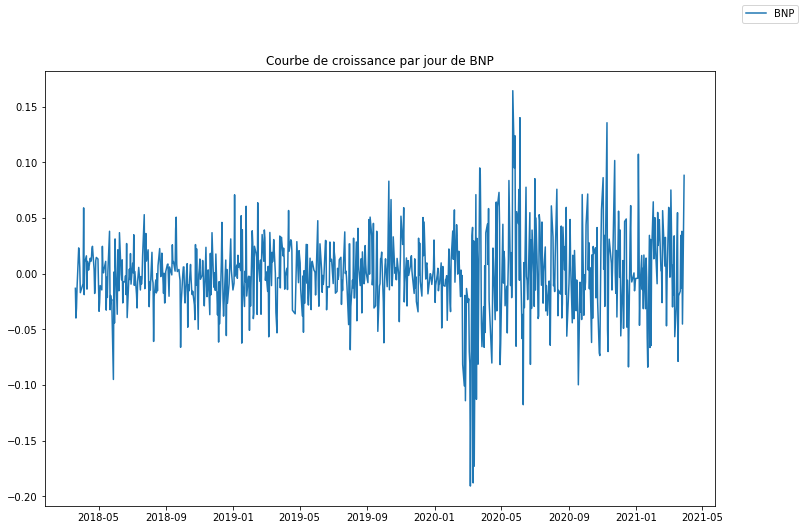

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
fig ,ax = plt.subplots(1,1, figsize =(12,8))
ax.plot(date,X[:,1], label='BNP')
ax.set_title("Courbe de croissance par jour de BNP")
fig.legend()
plt.figure()
print(len(X))

In [11]:

from sklearn.naive_bayes import BernoulliNB
#Model de classification de croissance avec SVC 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3)
model = svm.SVC(kernel = 'rbf' ,decision_function_shape='ovo')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
a = metrics.accuracy_score(y_test,y_pred)
p = metrics.precision_score(y_test,y_pred,pos_label=str(1),average="macro")
r = metrics.recall_score(y_test, y_pred,pos_label=str(1),average="macro")
print("Précision du model: ", a)
print("Précision du model: ", p)
print("Précision du model: ", r)


Précision du model:  0.4956896551724138
Précision du model:  0.51321044546851
Précision du model:  0.5031965506987809


/usr/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/usr/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [8]:

forecast_out = 30 #nb jours

df=df[['Adj Close']]

df['Prediction']= df.shift(-forecast_out)
df

,Adj Close,Prediction
Date,,
2018-03-20,48.429794,49.271030
2018-03-21,48.138905,49.035172
2018-03-22,47.258366,48.712830
2018-03-23,46.574375,49.255310
2018-03-26,46.291344,49.333927
...,...,...
2021-03-24,51.119999,NaN
2021-03-25,50.830002,NaN
2021-03-26,51.669998,NaN


In [13]:
forecast_out = 30 #nb jours
#ajout de colonnes (y= prediction )
df['Prediction']= df[['Adj Close']].shift(-forecast_out)
print(df.tail())

            Adj Close  Prediction
Date                             
2021-03-24  51.119999         NaN
2021-03-25  50.830002         NaN
2021-03-26  51.669998         NaN
2021-03-29  50.669998         NaN
2021-03-30  52.619999         NaN


In [1]:
X = np.array(df.drop(['Prediction'],1))
X = X[:-forecast_out]
y = np.array(df['Prediction'])
y = y[:-forecast_out]
#print(X,'\n',y)

NameError: name 'np' is not defined

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .8)
#help(SVR)

In [16]:
#model de regression test
svr_rbf = SVR(kernel ='rbf', C =1e3, gamma = .20)
C = np.exp(1*np.arange(-5,15))
for c in C:
    svr_rbf = SVR(kernel ='rbf', C =c, gamma = 20)
    svr_rbf.fit(x_train, y_train)
    svm_confidence = svr_rbf.score(x_test, y_test)
    print(f"score pour c = {c} svm: {svm_confidence}")
sve_rbf = SVR(kernel ='rbf', C =7.31, gamma = .20)

score pour c = 0.006737946999085467 svm: -0.007787852985971178
score pour c = 0.01831563888873418 svm: -0.005180470668388448
score pour c = 0.049787068367863944 svm: 0.004746634762196389
score pour c = 0.1353352832366127 svm: 0.020593604827216838
score pour c = 0.36787944117144233 svm: 0.06455811884518226
score pour c = 1.0 svm: 0.14186381599929665
score pour c = 2.718281828459045 svm: 0.20403458705997946
score pour c = 7.38905609893065 svm: 0.1875668338408788
score pour c = 20.085536923187668 svm: 0.11274208809096353
score pour c = 54.598150033144236 svm: -0.07142507832257539
score pour c = 148.4131591025766 svm: -0.21552269392389878
score pour c = 403.4287934927351 svm: -0.674499370933588
score pour c = 1096.6331584284585 svm: -2.6900414323637807
score pour c = 2980.9579870417283 svm: -12.229390857252643
score pour c = 8103.083927575384 svm: -33.95482298765285
score pour c = 22026.465794806718 svm: -46.76965881707296
score pour c = 59874.14171519782 svm: -68.98459286244092
score pour

In [17]:
svm_confidence = svr_rbf.score(x_test, y_test)
print("score svm: ", svm_confidence) #horrible

score svm:  -206.54343724239368


### data analysis

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .8)

reg = linear_model.BayesianRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
print(y_pred)
print("Moyenne absolue d'erreur: ", metrics.mean_absolute_error(y_test,y_pred))
print("Moyenne quadratique d'erreur: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
plt.plot(y_pred,y_test,'.')
#reg.score(x_test,x_train)

NameError: name 'y' is not defined

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from preprocessing import preprocessing
import sklearn.preprocessing as sklearnp
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [3]:
dataset = pd.read_csv("dataset.csv", sep=";")
dataset.head(5)

,symbol,longName,state,country,industry,sector,fullTimeEmployees,Open0,High0,Low0,...,Volume0,day,month,year,Open1,High1,Low1,Close1,Adj Close1,Volume1
0,A,"Agilent Technologies, Inc.",CA,United States,Diagnostics & Research,Healthcare,16400.0,66.800003,67.559998,62.090000,...,2989600.0,23,3,2020,65.529999,68.180000,64.599998,67.000000,66.359886,2868900.0
1,A,"Agilent Technologies, Inc.",CA,United States,Diagnostics & Research,Healthcare,16400.0,94.959999,97.540001,94.900002,...,1177100.0,27,7,2020,96.980003,97.250000,95.199997,95.300003,94.828430,1373700.0
2,A,"Agilent Technologies, Inc.",CA,United States,Diagnostics & Research,Healthcare,16400.0,98.709999,98.989998,96.889999,...,779200.0,5,8,2020,98.089996,98.830002,97.699997,97.889999,97.405609,958300.0
3,A,"Agilent Technologies, Inc.",CA,United States,Diagnostics & Research,Healthcare,16400.0,65.190002,69.879997,65.180000,...,4123900.0,19,3,2020,68.540001,68.589996,64.169998,65.760002,65.131737,3430700.0
4,A,"Agilent Technologies, Inc.",CA,United States,Diagnostics & Research,Healthcare,16400.0,86.559998,87.360001,86.110001,...,1302500.0,29,6,2020,87.330002,88.879997,87.239998,88.370003,87.932732,1920200.0


In [4]:
index, X, Y = preprocessing(dataset)
index, X, Y

Cleaning...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104062 entries, 0 to 104061
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              104062 non-null  int64  
 1   symbol             104062 non-null  object 
 2   longName           103730 non-null  object 
 3   state              78795 non-null   object 
 4   country            89324 non-null   object 
 5   industry           89072 non-null   object 
 6   sector             89072 non-null   object 
 7   fullTimeEmployees  73372 non-null   float64
 8   Open0              104062 non-null  float64
 9   High0              104062 non-null  float64
 10  Low0               104062 non-null  float64
 11  Close0             104062 non-null  float64
 12  Adj Close0         104062 non-null  float64
 13  Volume0            104062 non-null  float64
 14  day                104062 non-null  int64  
 15  month              104062 non-null  int

(       symbol                       longName
 0           A     Agilent Technologies, Inc.
 1           A     Agilent Technologies, Inc.
 2           A     Agilent Technologies, Inc.
 3           A     Agilent Technologies, Inc.
 4           A     Agilent Technologies, Inc.
 ...       ...                            ...
 104057   ZYNE  Zynerba Pharmaceuticals, Inc.
 104058   ZYNE  Zynerba Pharmaceuticals, Inc.
 104059   ZYNE  Zynerba Pharmaceuticals, Inc.
 104060   ZYNE  Zynerba Pharmaceuticals, Inc.
 104061   ZYNE  Zynerba Pharmaceuticals, Inc.
 
 [104062 rows x 2 columns],
               0         1         2         3         4         5         6   \
 0       0.317042 -0.522874 -1.165300  1.908566  1.056990  0.769610  0.765058   
 1       0.041232 -0.569485 -1.194638  1.897376  1.034700  0.787678 -0.030202   
 2      -0.020072 -0.580235 -1.201402  1.895031  1.024704  0.795576 -0.728697   
 3       0.488624 -0.494687 -1.146493  1.913251  1.062525  0.767364  0.660610   
 4       0.06

In [116]:
#help(linear_model.BayesianRidge)
help(reg.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._bayes.BayesianRidge instance
    Return the coefficient of determination :math:`R^2` of the
    prediction.
    
    The coefficient :math:`R^2` is defined as :math:`(1 - \frac{u}{v})`,
    where :math:`u` is the residual sum of squares ``((y_true - y_pred)
    ** 2).sum()`` and :math:`v` is the total sum of squares ``((y_true -
    y_true.mean()) ** 2).sum()``. The best possible score is 1.0 and it
    can be negative (because the model can be arbitrarily worse). A
    constant model that always predicts the expected value of `y`,
    disregarding the input features, would get a :math:`R^2` score of
    0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where

In [117]:
import sklearn.linear_model as linear_model

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = .8)
alpha_1= np.exp(np.linspace(-10,1, 30))
score=[]
print(alpha_1)
alpha2= 7.90490323e-04
for alpha in alpha_1:
    
    reg = linear_model.BayesianRidge(alpha_1 = alpha2, lambda_1=alpha)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    #reg.fit(X_test,y_test)
    s = reg.score(X_test,y_test)
    score.append(s)
    print(f"Bayesian Ridge score: {s} for {alpha}")
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
print(y_pred)
print("Moyenne absolue d'erreur: ", metrics.mean_absolute_error(y_test,y_pred))
print("Moyenne quadratique d'erreur: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Bayesian Ridge score:", reg.score(X_test,y_test))
#plt.plot(y_test,y_pred,'.')
plt.plot(alpha_1, score,label="score pour aplha")
#reg.score(x_test,x_train)


[4.53999298e-05 6.63418489e-05 9.69437824e-05 1.41661668e-04
 2.07006861e-04 3.02494254e-04 4.42027734e-04 6.45924725e-04
 9.43874598e-04 1.37926174e-03 2.01548271e-03 2.94517746e-03
 4.30371850e-03 6.28892256e-03 9.18985453e-03 1.34289181e-02
 1.96233620e-02 2.86751571e-02 4.19023322e-02 6.12308918e-02
 8.94752612e-02 1.30748093e-01 1.91059112e-01 2.79190183e-01
 4.07974044e-01 5.96162869e-01 8.71158770e-01 1.27300381e+00
 1.86021050e+00 2.71828183e+00]
Bayesian Ridge score: 0.0622949940228722 for 4.5399929762484854e-05
Bayesian Ridge score: 0.06229499249433024 for 6.634184887333097e-05
Bayesian Ridge score: 0.06229499026070795 for 9.694378240137177e-05
Bayesian Ridge score: 0.06229498699676639 for 0.00014166166764855543
Bayesian Ridge score: 0.0622949822272445 for 0.00020700686092361344
Bayesian Ridge score: 0.062294975257650154 for 0.0003024942539555451
Bayesian Ridge score: 0.062294965073138586 for 0.0004420277340947018
Bayesian Ridge score: 0.06229495019073439 for 0.00064592472469

KeyboardInterrupt: 

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=8, shuffle=True)
reg = linear_model.BayesianRidge()
scores = cross_val_score(reg, X,Y , cv = kf)
print(f"Bayesian Rdige:  Moyenne de score: {scores.mean()} et écart-type {scores.std()} ")

Bayesian Rdige:  Moyenne de score: 0.07018489793695094 et écart-type 0.047612212438245864 


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import svm
import sklearn.linear_model as linear_model

model = [linear_model.BayesianRidge, svm.SVR, linear_model.LinearRegression]
#print(str(linear_model.BayesianRidge.__name__))
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
for m in model:
    
    scores = cross_val_score(m(), X,Y , cv = kf,  n_jobs = 5, verbose =1)
    print(f"{m.__name__}:  Moyenne de score: {scores.mean()} et écart-type {scores.std()} ")

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    5.1s remaining:    7.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    5.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


BayesianRidge:  Moyenne de score: 0.08478724578829581 et écart-type 0.04521262573592651 


In [24]:
max(Y)

6.0000001862645735

[-0.02412638  0.07662291  0.00029725 ...  0.05201367  0.01686097
  0.02518732]
Moyenne absolue d'erreur:  0.039967065150134574
Moyenne quadratique d'erreur:  0.06877019928619793


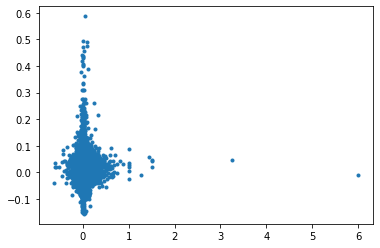

In [25]:
from sklearn import svm
###SVM
reg = svm.SVR()
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = .5)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(y_pred)
print("Moyenne absolue d'erreur: ", metrics.mean_absolute_error(y_train,y_pred))
print("Moyenne quadratique d'erreur: ", np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
plt.plot(y_train,y_pred,'.')
#reg.score(x_test,x_train)

In [26]:
print("SVR score:", reg.score(X_test, y_test))

#help(metrics.accuracy_score)

-0.0869290311094173

[-0.01308649  0.04429912  0.01547578 ...  0.00213023  0.0097635
  0.00751878]
Moyenne absolue d'erreur:  0.03048491890612982
Moyenne quadratique d'erreur:  0.07536188054242121


0.020141004488327563

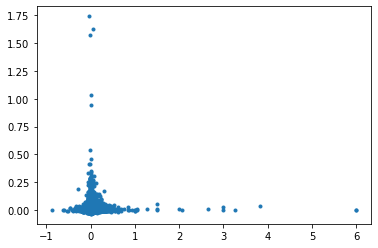

In [30]:
from sklearn.linear_model import LinearRegression
###SVM
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = .5)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(y_pred)
print("Moyenne absolue d'erreur: ", metrics.mean_absolute_error(y_train,y_pred))
print("Moyenne quadratique d'erreur: ", np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
plt.plot(y_train,y_pred,'.')
#reg.score(x_test,x_train)
print("Linear Regression score: ", reg.score(X_test, y_test))

/usr/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


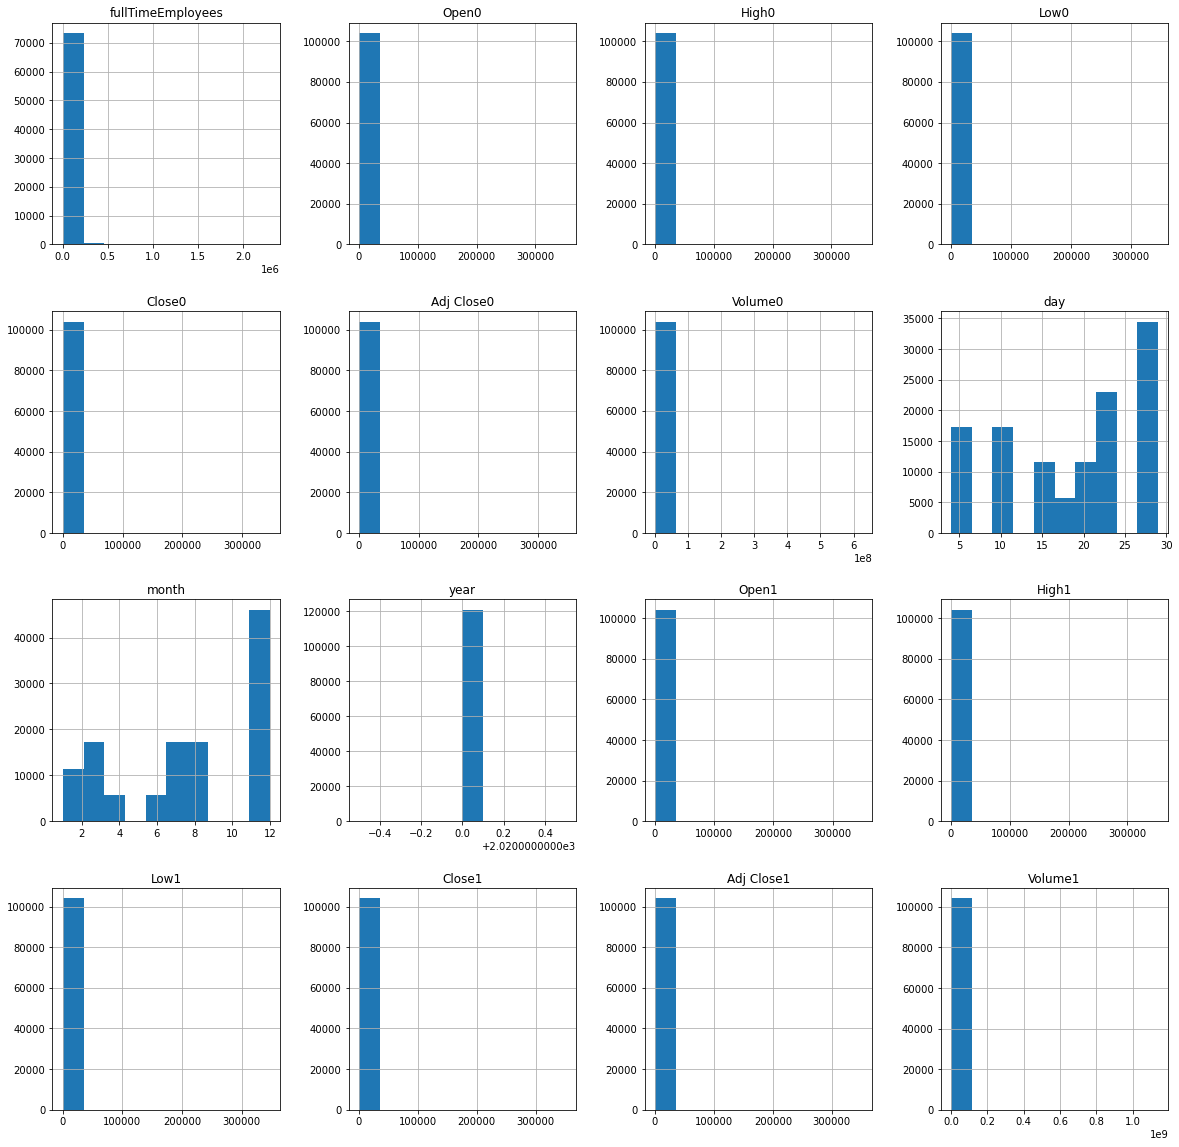

In [9]:
dataset.hist(figsize=(20,20))
plt.show()

/usr/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 2020.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 2020.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 2020.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


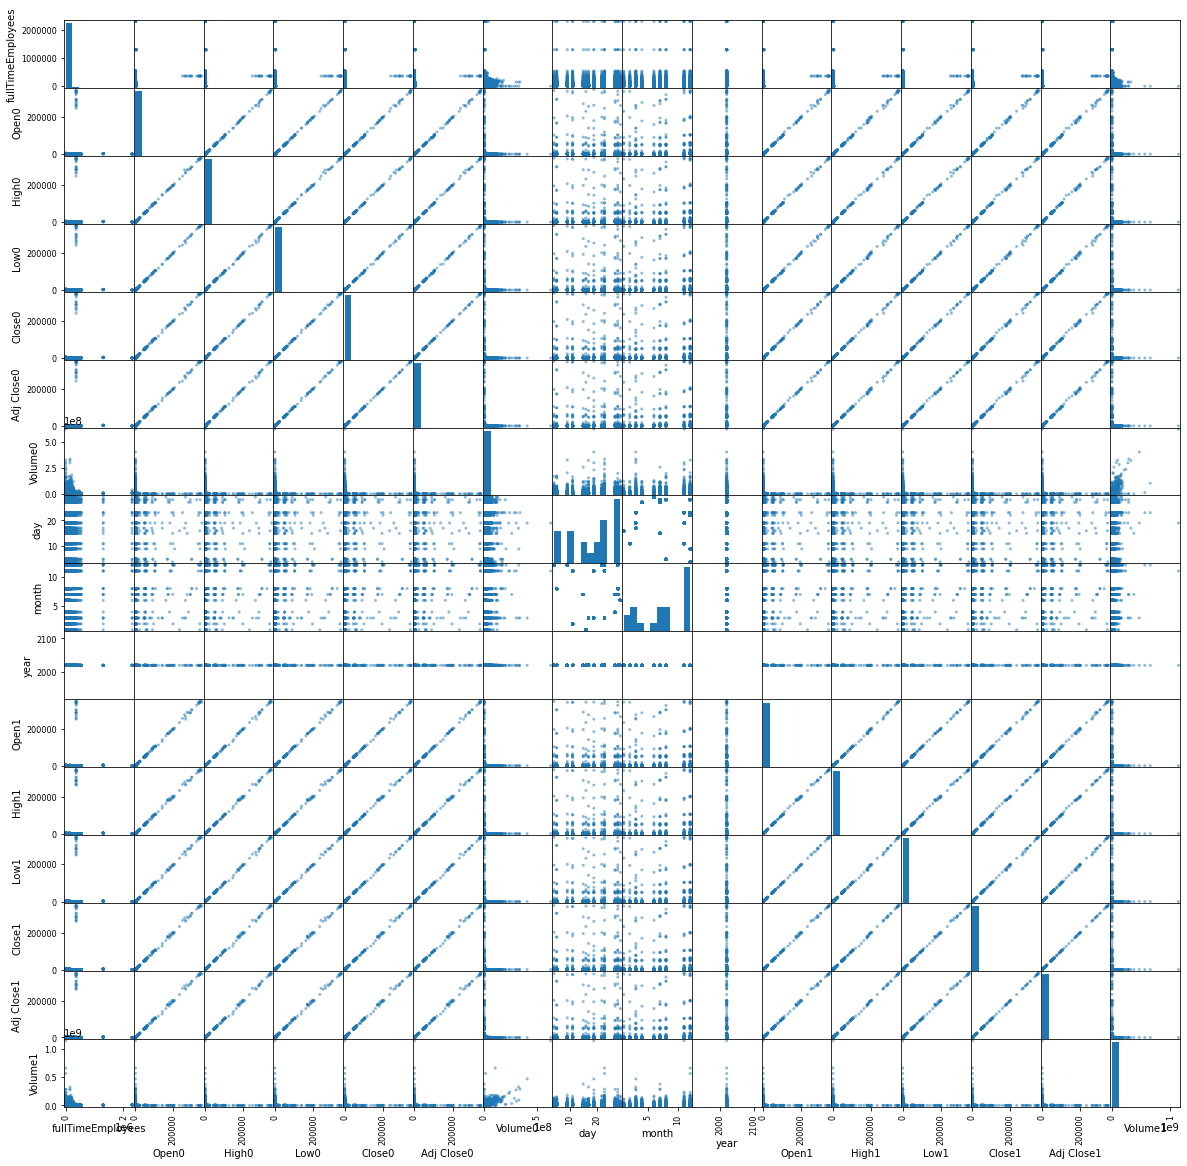

In [12]:
pd.plotting.scatter_matrix(dataset, figsize=(20,20))
plt.show()